In [1]:
import numpy as np
import matplotlib.pyplot as plt
from corner import corner

import jax
import jax.numpy as jnp
import numpyro

In [2]:
def model():
    n = numpyro.sample('n', numpyro.distributions.DiscreteUniform())
    u = numpyro.sample('u', numpyro.distributions.Uniform(-5, 5))
    x, lp = jax.lax.cond(
        n == 0,
        lambda: (1.0, -5.0),
        lambda: (u, numpyro.distributions.Normal().log_prob(u)),
    )
    numpyro.deterministic('x', x)
    numpyro.factor('lp', lp)

In [3]:
nuts = numpyro.infer.NUTS(model)
gibbs = numpyro.infer.DiscreteHMCGibbs(nuts)
mcmc = numpyro.infer.MCMC(gibbs, num_warmup = 10_000, num_samples = 10_000)
mcmc.run(jax.random.key(0))
mcmc.print_summary()

sample: 100%|█████████████████████| 20000/20000 [00:39<00:00, 501.73it/s, 1 steps of size 8.75e-01. acc. prob=0.87]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         n      0.94      0.24      1.00      1.00      1.00   3383.46      1.00
         u     -0.01      1.18      0.00     -1.72      1.91   3681.55      1.00



In [4]:
numpyro.diagnostics.print_summary(mcmc.get_samples(), group_by_chain = False)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         n      0.94      0.24      1.00      1.00      1.00   3383.46      1.00
         u     -0.01      1.18      0.00     -1.72      1.91   3681.55      1.00
         x      0.04      1.00      0.08     -1.63      1.60   4093.57      1.00



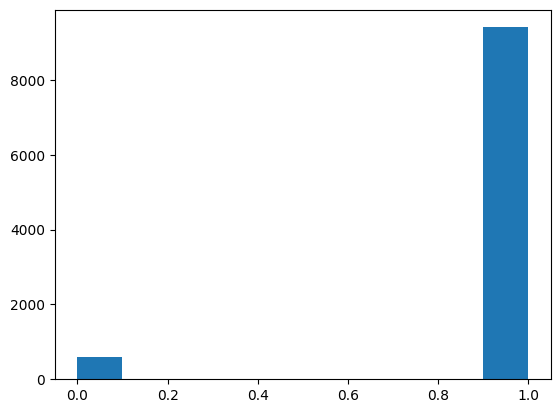

In [6]:
plt.hist(mcmc.get_samples()['n']);

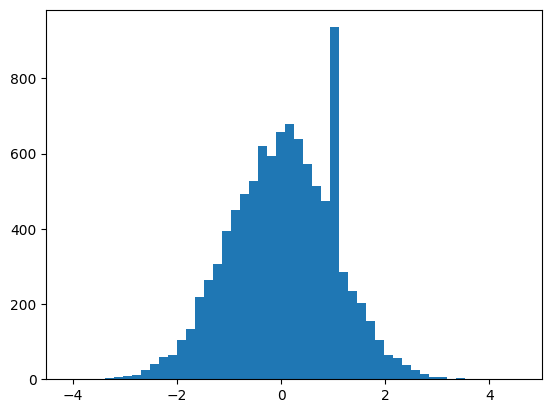

In [5]:
plt.hist(mcmc.get_samples()['x'], bins = 50);